# Code 1: Building a Facial Recognition Model

> Dissertation Task-1 (6812009)

In [1]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score
import seaborn as sns

# Loading Olivetti Faces dataset
data = fetch_olivetti_faces()

# Extracting features and labels
X = data.images
y = data.target

# Reshaping data to fit the model
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)

# One-hot encoding the labels
num_classes = len(np.unique(y))
y = to_categorical(y, num_classes)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [2]:
# CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(X.shape[1], X.shape[2], 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Nadam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# Training the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 40)                  │           5,160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,629,736 (6.22 MB)

 Trainable params: 1,629,736 (6.22 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 0.0094 - loss: 3.7496
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.0348 - loss: 3.6860
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.0971 - loss: 3.6460
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.0945 - loss: 3.5541
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - accuracy: 0.1498 - loss: 3.4151
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.2224 - loss: 3.1666
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.3166 - loss: 2.7641
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.4037 - loss: 2.3235
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.4812 - loss: 1.9886
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.5005 - loss: 1.8296
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.6373 - loss: 1.4019
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.6589 - lo

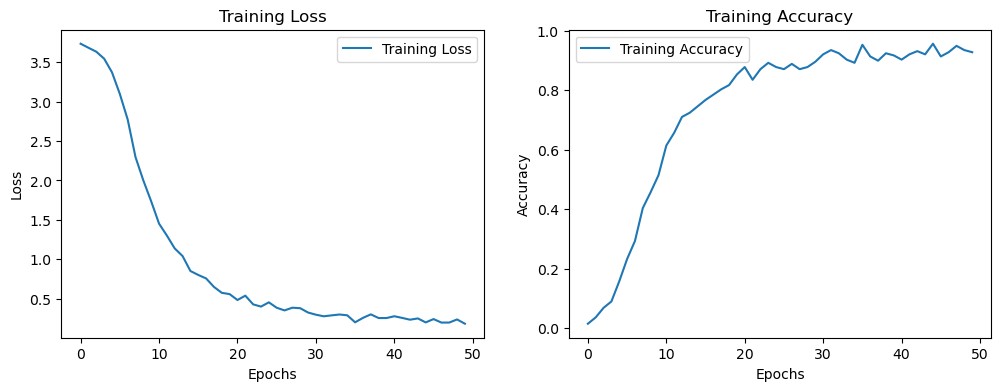

In [3]:
# Plotting training loss and accuracy
plt.figure(figsize=(12, 4))

# Plotting loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plotting accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9175 - loss: 0.4499
Test accuracy: 0.9083
Test loss: 0.5380
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


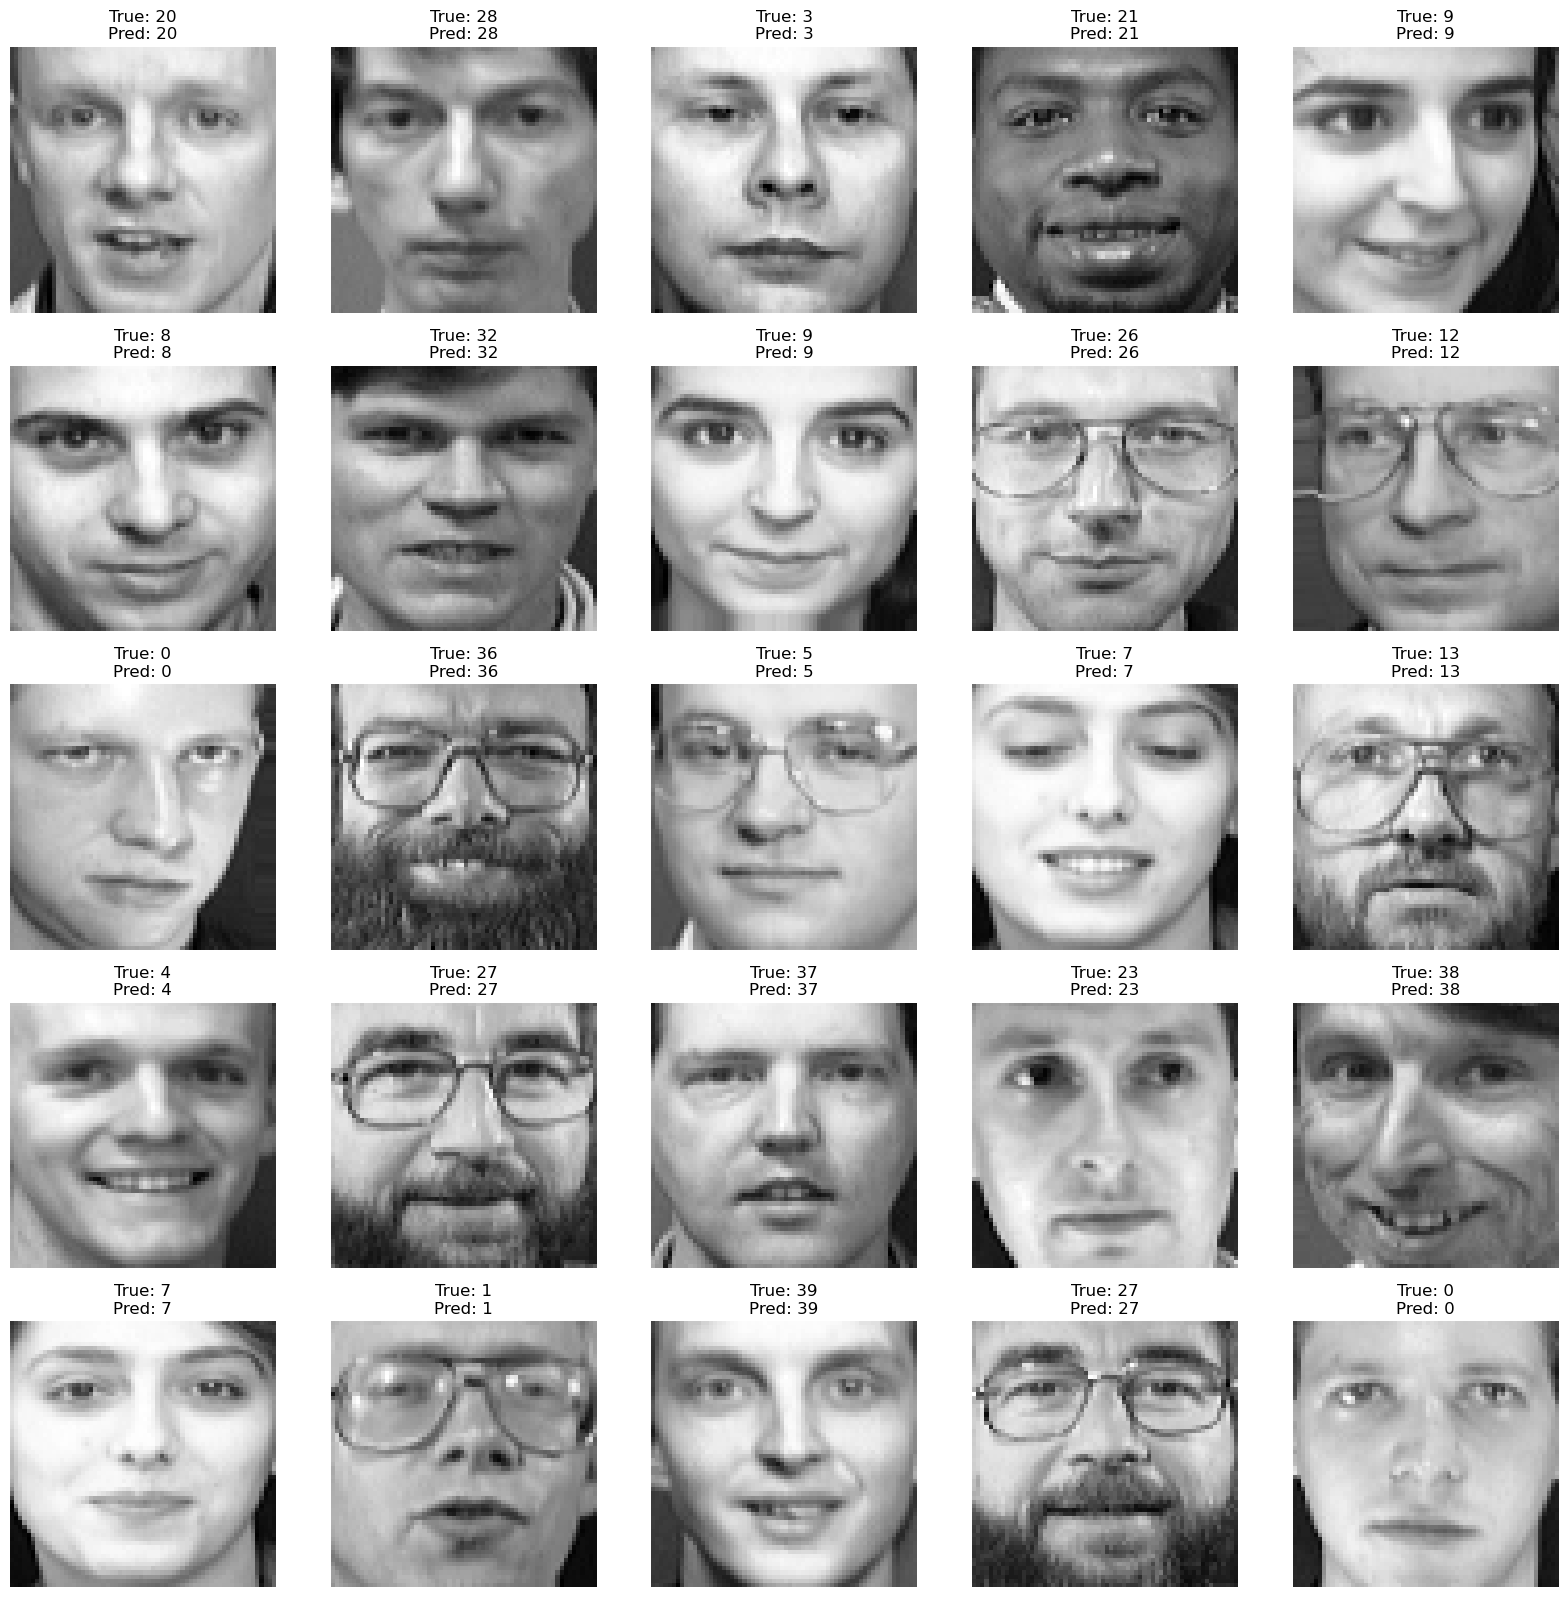

In [4]:
# Evaluating the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')
print(f'Test loss: {test_loss:.4f}')

# Predicting on the test set
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Visualizing test predictions along with the images and their predicted labels
plt.figure(figsize=(20, 20))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_test[i].reshape(X.shape[1], X.shape[2]), cmap='gray')
    plt.title(f'True: {true_classes[i]}\nPred: {predicted_classes[i]}')
    plt.axis('off')

plt.show()

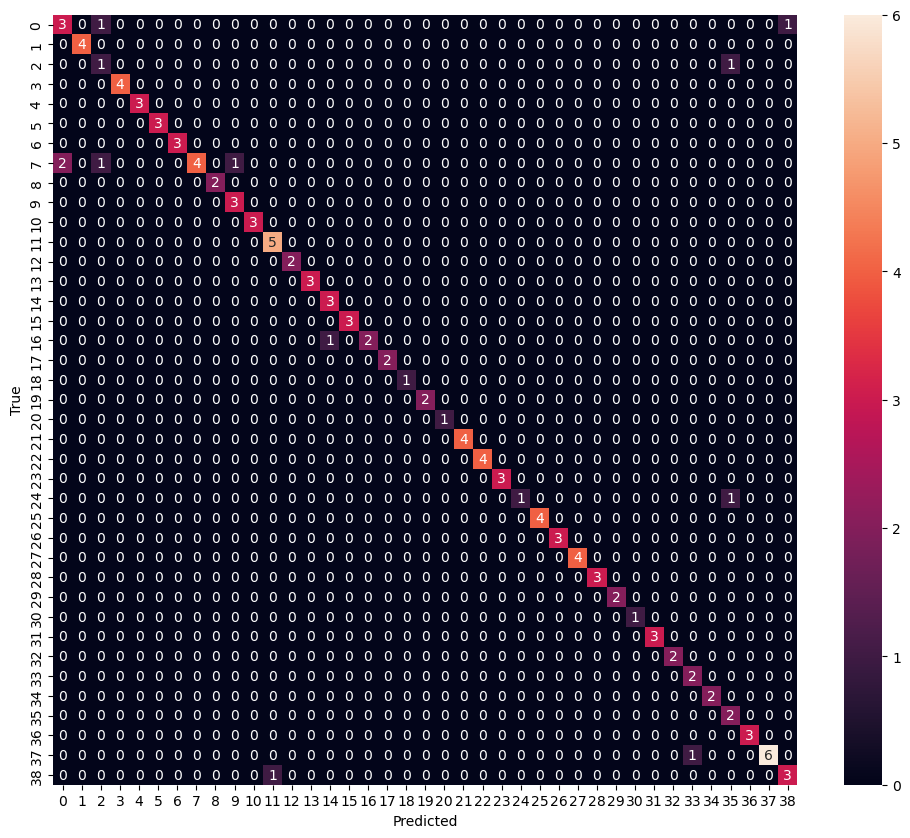

In [5]:
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [6]:
# Generating classification report
report = classification_report(true_classes, predicted_classes)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       1.00      1.00      1.00         4
           2       0.33      0.50      0.40         2
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.50      0.67         8
           8       1.00      1.00      1.00         2
           9       0.75      1.00      0.86         3
          10       1.00      1.00      1.00         3
          11       0.83      1.00      0.91         5
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         3
          14       0.75      1.00      0.86         3
          15       1.00      1.00      1.00         3
          17       1.00      0.67      0.80         3
   

In [7]:
# Cohen's Kappa Score
kappa_score = cohen_kappa_score(true_classes, predicted_classes)
print(f"Cohen's Kappa Score: {kappa_score:.4f}")

Cohen's Kappa Score: 0.9056


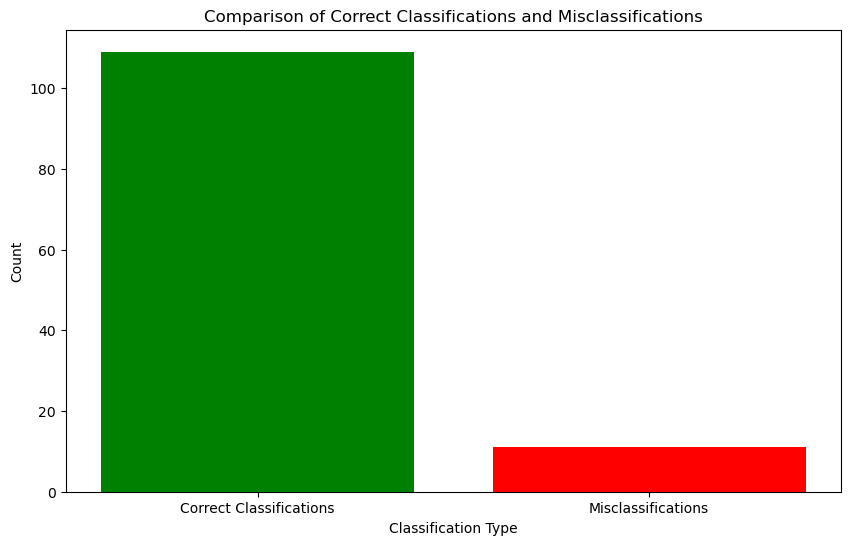

In [8]:
# Calculating the number of correct and incorrect classifications
correct_classifications = np.sum(true_classes == predicted_classes)
misclassifications = np.sum(true_classes != predicted_classes)

labels = ['Correct Classifications', 'Misclassifications']
counts = [correct_classifications, misclassifications]

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color=['green', 'red'])
plt.xlabel('Classification Type')
plt.ylabel('Count')
plt.title('Comparison of Correct Classifications and Misclassifications')
plt.show()

In [9]:
# Save the trained model to a file
model.save('FR_Olivetti_CNN_Model.h5')